# Análisis de normalidad

Los análisis de normalidad tienen como objetivo analizar si los datos disponibles podrían proceder de una población con una distribución normal. Existen tres estrategias principales abordar este análisis:

* Representaciones gráficas

* Métodos analíticos

* Test de hipótesis.

Uno de los ejemplos más empleados cuando se habla de variables aleatorias que siguen una distribución normal es la altura de las personas. Esta afirmación no es arbitraria, los procesos cuyo resultado es la suma de muchas pequeñas interacciones suelen converger en una distribución normal. La altura de una persona, es el resultado de miles de factores que se suman unos a otros condicionando el crecimiento.

Veremos ahora diferentes estrategias para determinar si la altura de un conjunto de personas sigue una distribución normal.

## Librerías

In [1]:
# Tratamiento de datos
# ==============================================================================
import pandas as pd
import numpy as np

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

# Preprocesado y análisis
# ==============================================================================
import statsmodels.api as sm
from scipy import stats

# Configuración matplotlib
# ==============================================================================
plt.style.use('ggplot')

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

## Datos

Los datos utilizados en este ejemplo se han obtenido del libro Statistical Rethinking by Richard McElreath. El set de datos contiene información recogida por Nancy Howell a finales de la década de 1960 sobre el pueblo !Kung San, que viven en el desierto de Kalahari entre Botsuana, Namibia y Angola.

In [3]:
# Datos
# ==============================================================================
url = ('https://raw.githubusercontent.com/JoaquinAmatRodrigo/' +
       'Estadistica-machine-learning-python/master/data/Howell1.csv')
datos = pd.read_csv(url)
print(datos.info())
datos.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 544 entries, 0 to 543
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   height  544 non-null    float64
 1   weight  544 non-null    float64
 2   age     544 non-null    float64
 3   male    544 non-null    int64  
dtypes: float64(3), int64(1)
memory usage: 17.1 KB
None


,height,weight,age,male
0,151.765,47.825606,63.0,1
1,139.700,36.485807,63.0,0
2,136.525,31.864838,65.0,0
3,156.845,53.041914,41.0,1
4,145.415,41.276872,51.0,0


#### Notas

Como podemos observar la información de nuestro dataframe contiene las siguientes columnas:
* height (altura)
* weight (peso)
* age (edad)
* male (hombre): en este caso estamos usando los datos de esta columna como variables binaria cero o uno
Para proósito de este estudio seleccionaremos únicamente mujeres mayores de 15 años, es decir, en la columna "male" seleccionaremos únicamente aquellos que tengan como valor "0" en conjunto con los datos que en la columna "age" sean mayores a 15.0

In [4]:
datos = datos[(datos.age > 15) & (datos.male ==0)]
peso = datos['weight']

## Métodos gráficos

### Histograma

Uno de los métodos gráficos más empleados para el análisis de normalidad consiste en representar los datos mediante un histograma y superponer la curva de una distribución normal con la misma media y desviación estándar que los datos disponibles.

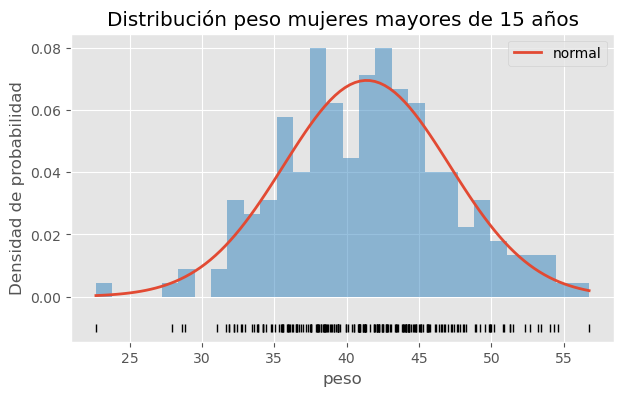

In [5]:
# Histograma + curva normal teórica
# ==============================================================================

# Valores de la media (mu) y desviación típica (sigma) de los datos
mu, sigma = stats.norm.fit(peso)

# Valores teóricos de la normal en el rango observado
x_hat = np.linspace(min(peso), max(peso), num=100)
y_hat = stats.norm.pdf(x_hat, mu, sigma)

# Gráfico
fig, ax = plt.subplots(figsize=(7,4))
ax.plot(x_hat, y_hat, linewidth=2, label='normal')
ax.hist(x=peso, density=True, bins=30, color="#3182bd", alpha=0.5)
ax.plot(peso, np.full_like(peso, -0.01), '|k', markeredgewidth=1)
ax.set_title('Distribución peso mujeres mayores de 15 años')
ax.set_xlabel('peso')
ax.set_ylabel('Densidad de probabilidad')
ax.legend();

#### Notas

stats = librería.

norm.fit() = se utiliza para ajustar una distribución normal a un conjunto de datos dado, calculará los parámetros de la distribución normal que mejor se ajusten a esos datos. Estos parámetros incluyen la media (promedio) y la desviación estándar de la distribución normal ajustada.

np.linspace() = se utiliza para generar una secuencia de números equidistantes dentro de un rango especificado.

stats.norm.pdf() = calcular la función de densidad de probabilidad (PDF, por sus siglas en inglés) de una distribución normal en un punto específico.

### Gráficos Q-Q

Otra representación utilizada con frecuencia son los gráficos de cuantiles teóricos (Gráficos Q-Q). Estos gráficos comparan los cuantiles de la distribución observada con los cuantiles teóricos de una distribución normal con la misma media y desviación estándar que los datos. Cuanto más se aproximen los datos a una normal, más alineados están los puntos entorno a la recta.

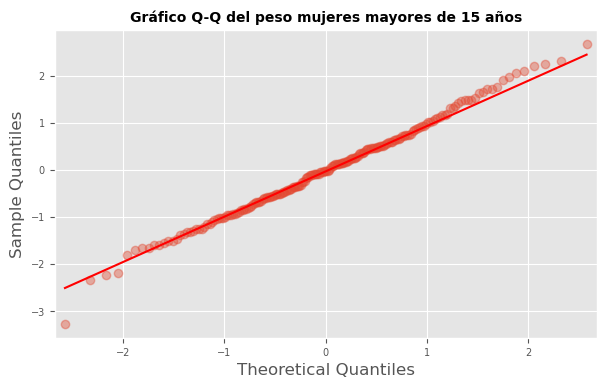

In [6]:
# Gráfico Q-Q
# ==============================================================================
fig, ax = plt.subplots(figsize=(7,4))
sm.qqplot(
    peso,
    fit   = True,
    line  = 'q',
    alpha = 0.4,
    lw    = 2,
    ax    = ax
)
ax.set_title('Gráfico Q-Q del peso mujeres mayores de 15 años', fontsize = 10,
             fontweight = "bold")
ax.tick_params(labelsize = 7)

El análisis gráfico parece indicar que los datos siguen una distribución normal.

## Métodos analíticos asimetría y curtosis

Los estadísticos de asimetría (Skewness) y curtosis pueden emplearse para detectar desviaciones de la normalidad. Un valor de curtosis y/o coeficiente de asimetría entre -1 y 1, es generalmente considerada una ligera desviación de la normalidad (Bulmer, 1979), (Brown, n.d.). Entre -2 y 2 hay una evidente desviación de la normal pero no extrema.



In [7]:
print('Kursotis:', stats.kurtosis(peso))
print('Skewness:', stats.skew(peso))

Kursotis: 0.05524614843093856
Skewness: 0.032122514283202334


## Contraste de hipótesis

Los test Shapiro-Wilk test y D'Agostino's K-squared test son dos de los test de hipótesis más empleados para analizar la normalidad. En ambos, se considera como hipótesis nula que los datos proceden de una distribución normal.

El p-value de estos test indica la probabilidad de obtener unos datos como los observados si realmente procediesen de una población con una distribución normal con la misma media y desviación que estos. Por lo tanto, si el p-value es menor que un determinado valor (típicamente 0.05), entonces se considera que hay evidencias suficientes para rechazar la normalidad.

El test de Shapiro-Wilk se desaconseja cuando se dispone de muchos datos *(más de 50)* por su elevada sensibilidad a pequeñas desviaciones de la normal.

In [8]:
# Shapiro-Wilk test
# ==============================================================================
shapiro_test = stats.shapiro(peso)
shapiro_test

ShapiroResult(statistic=0.9963728785514832, pvalue=0.9239885210990906)

In [9]:
# D'Agostino's K-squared test
# ==============================================================================
k2, p_value = stats.normaltest(peso)
print(f"Estadístico = {k2}, p-value = {p_value}")

Estadístico = 0.19896549779904893, p-value = 0.9053055672511008


Ninguno de los test muestra evidencias para rechazar la hipótesis de que los datos se distribuyen de forma normal (p-value muy próximo a 1).

Cuando estos test se emplean con la finalidad de verificar las condiciones de métodos paramétricos, por ejemplo un t-test o un ANOVA, es importante tener en cuenta que, al tratarse de p-values, cuanto mayor sea el tamaño de la muestra más poder estadístico tienen y más fácil es encontrar evidencias en contra de la hipótesis nula de normalidad. Al mismo tiempo, cuanto mayor sea el tamaño de la muestra, menos sensibles son los métodos paramétricos a la falta de normalidad. Por esta razón, es importante no basar las conclusiones únicamente en el p-value del test, sino también considerar la representación gráfica y el tamaño de la muestra.

## Consecuencias de la falta de normalidad

El hecho de no poder asumir la normalidad influye principalmente en los test de hipótesis paramétricos (t-test, anova,…) y en los modelos de regresión. Las principales consecuencias de la falta de normalidad son:

Los estimadores mínimo-cuadráticos no son eficientes (de mínima varianza).

Los intervalos de confianza de los parámetros del modelo y los contrastes de significancia son solamente aproximados y no exactos.

Los test estadísticos expuestos requieren que la población de la que procede la muestra tenga una distribución normal, no la muestra en sí. Si la muestra se distribuye de forma normal, se puede aceptar que así lo hace la población de origen. En el caso de que la muestra no se distribuya de forma normal pero se tenga certeza de que la población de origen sí lo hace, entonces, puede estar justificado aceptar los resultados obtenidos por los contrastes paramétricos como válidos.

## Importancia

Realizar una prueba de normalidad es importante en el análisis de datos porque nos permite evaluar si una muestra de datos sigue una distribución normal o no. La distribución normal, también conocida como distribución de Gauss o campana de Gauss, es una de las distribuciones más utilizadas en estadística debido a sus propiedades bien conocidas.

Aquí hay algunas razones por las que es importante realizar una prueba de normalidad:

1. Aplicabilidad de técnicas estadísticas: Muchas técnicas estadísticas y modelos se basan en la suposición de que los datos provienen de una distribución normal. Algunos ejemplos incluyen pruebas de hipótesis paramétricas como la prueba t de Student, análisis de varianza (ANOVA), regresión lineal y muchos más. Si los datos no siguen una distribución normal, es posible que estas técnicas no sean apropiadas o sus resultados puedan ser sesgados.

2. Inferencia estadística precisa: La distribución normal tiene propiedades estadísticas bien conocidas, como la simetría y la definición precisa de intervalos de confianza. Si los datos se distribuyen normalmente, podemos realizar inferencias precisas sobre la población objetivo y tomar decisiones más confiables basadas en estos resultados.

3. Asunciones de modelos estadísticos: Algunos modelos estadísticos asumen la normalidad de los errores, como el modelo de regresión lineal y los modelos de series de tiempo. Verificar la normalidad de los errores es esencial para validar las suposiciones subyacentes y garantizar la confiabilidad de los resultados y las conclusiones derivadas del modelo.

4. Análisis exploratorio de datos: La prueba de normalidad puede ser parte del análisis exploratorio de datos, que nos ayuda a comprender mejor las características de los datos y detectar posibles desviaciones de la distribución normal. Esto puede proporcionar información valiosa sobre la naturaleza de los datos y la necesidad de aplicar técnicas de análisis estadístico adecuadas.

Es importante tener en cuenta que la normalidad no es siempre una suposición necesaria o apropiada en todos los casos. En algunos casos, los datos pueden seguir otras distribuciones o pueden requerirse técnicas no paramétricas. Sin embargo, la prueba de normalidad sigue siendo útil para evaluar la idoneidad de los supuestos y garantizar la validez de los análisis estadísticos realizados.